# 01b - Statistics on the dataset containing DFT calculations

This notebook reproduces Fig. S4 and S5 from the manuscript, as well as Table S3. It loads the dataset of DFT calculations from a JSON file and plots the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from plotting import savefig
from scipy import stats
import itertools
import tqdm
from ase import Atoms
from mkite_catalysis.runners.deduplicate import Deduplicator

plt.style.use("paper")

## Loading the data

In [2]:
data = pd.read_json("../data/231003-COv-data.json")

In [3]:
FACETS = [100, 111, 211, 331, 410, 711]
NADS = np.arange(1, 19)
facet_idx = {
    100: 0,
    111: 1,
    211: 2,
    331: 3,
    410: 4,
    711: 5,
}

In [4]:
print(data["unrelax_binding_site"].mean() / 2)
print(data["unrelax_binding_site"].std() / 2)

0.3744751732187399
0.47016738182050033


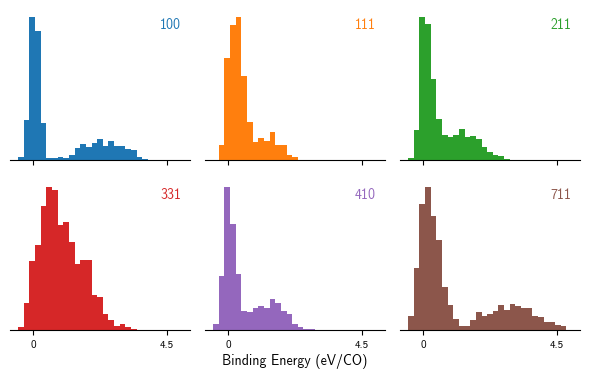

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(6, 4), sharex=True)

bins = np.linspace(-0.5, 5, 30)

for ax, (facet, grp) in zip(axs.reshape(-1), data.groupby("facet")):
    j = facet_idx[facet]
    ax.hist(grp["unrelax_binding_site"], bins=bins, color=cm.tab10(j))
    ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top", color=cm.tab10(j))

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ticks = [0, 4.5]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)

fig.supxlabel("Binding Energy (eV/CO)", y=0.065, fontsize=10)

fig.tight_layout()
savefig(fig, "01-dset-distributions.pdf")
plt.show()

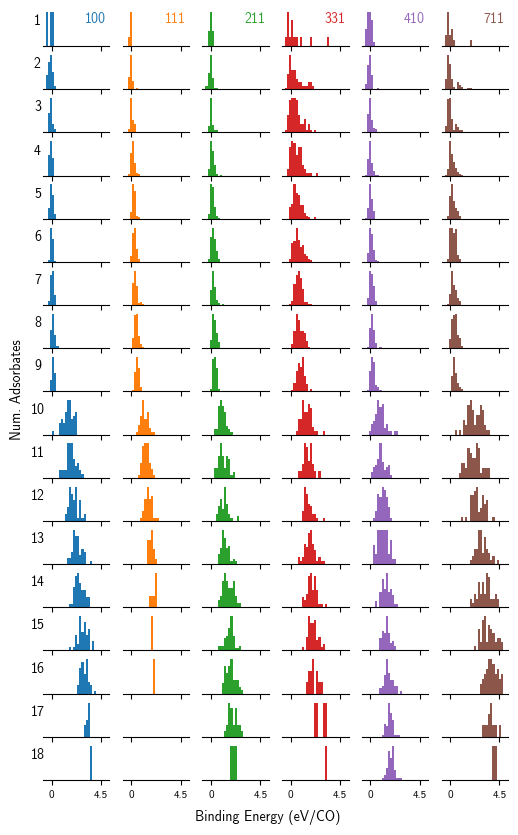

In [6]:
fig, axs = plt.subplots(18, 6, figsize=(6, 10), sharex=True)

bins = np.linspace(-0.5, 5.0, 30)

for (facet, nads), grp in data.groupby(["facet", "num_adsorbates"]):
    i, j = nads - 1, facet_idx[facet]
    ax = axs[i, j]
    ax.hist(grp["unrelax_binding_site"], bins=bins, color=cm.tab10(j))
    
    if i == 0:
        ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top", color=cm.tab10(j))

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ticks = [0, 4.5]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)
#     ax.set_xlabel("E$_b$ (eV/CO)", fontsize=10)
    
for i, ax in enumerate(axs[:, 0], 1):
    ax.set_ylabel(i, rotation=0)

fig.supxlabel("Binding Energy (eV/CO)", y=0.065, fontsize=10)
fig.supylabel("Num. Adsorbates", x=0.07, fontsize=10)

savefig(fig, "01-dset-distributions-splits.pdf")
plt.show()

## Graphic for Fig. 1c

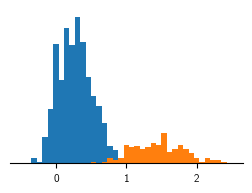

In [7]:
fig, ax = plt.subplots(figsize=(3, 2))

bins = np.linspace(-0.5, 2.5, 40)

grp = data.loc[data.facet == 111]

lowcov = grp.loc[grp.num_adsorbates < 10]
highcov = grp.loc[grp.num_adsorbates >= 10]

ax.hist(lowcov["unrelax_binding_site"], bins=bins, color=cm.tab10(0))
ax.hist(highcov["unrelax_binding_site"], bins=bins, color=cm.tab10(1))

ax.spines["left"].set_visible(False)
ax.set_yticks([])
# ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")

savefig(fig, "01-dset-111.pdf")
plt.show()

## Statistics

In [8]:
table = data.groupby(["facet", "num_adsorbates"])["unrelax_id"].count().reset_index()
table = table.pivot(index="num_adsorbates", columns="facet", values="unrelax_id")
table = table.fillna(0).astype(int)

In [9]:
table.sum().sum()

6793

In [10]:
print(table.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
facet & 100 & 111 & 211 & 331 & 410 & 711 \\
num_adsorbates &  &  &  &  &  &  \\
\midrule
1 & 3 & 5 & 28 & 15 & 29 & 16 \\
2 & 28 & 66 & 95 & 95 & 95 & 87 \\
3 & 82 & 99 & 100 & 100 & 100 & 100 \\
4 & 95 & 100 & 100 & 100 & 100 & 100 \\
5 & 100 & 100 & 100 & 100 & 100 & 100 \\
6 & 100 & 100 & 100 & 100 & 100 & 100 \\
7 & 100 & 100 & 100 & 100 & 100 & 100 \\
8 & 100 & 100 & 100 & 100 & 100 & 100 \\
9 & 100 & 100 & 100 & 100 & 100 & 100 \\
10 & 50 & 50 & 50 & 50 & 50 & 50 \\
11 & 50 & 50 & 50 & 50 & 50 & 50 \\
12 & 50 & 50 & 50 & 50 & 50 & 50 \\
13 & 50 & 21 & 50 & 50 & 50 & 50 \\
14 & 50 & 6 & 50 & 50 & 50 & 50 \\
15 & 50 & 1 & 50 & 50 & 50 & 50 \\
16 & 50 & 1 & 50 & 12 & 50 & 50 \\
17 & 11 & 0 & 26 & 4 & 50 & 12 \\
18 & 2 & 0 & 6 & 1 & 50 & 2 \\
\bottomrule
\end{tabular}

